# Description

This notebook extracts doctrines on the science of the soul from the commentaries by Anonymus Vennebusch, Merton 275, and Anonymus Bernardini.

The purpose is to demonstrate the distribution of shared material among the three.

# Procedure

## Utility functions and setup

In [30]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from os import path

%matplotlib inline

from neo4j.v1 import GraphDatabase

sns.set_context("paper", font_scale=1.8)

In [31]:
uri = "bolt://localhost:7687"
driver = GraphDatabase.driver(uri, auth=("neo4j", "1234"))

In [32]:
def run_query(string):
    with driver.session() as session:
        with session.begin_transaction() as tx:
            return tx.run(string)

## List of authors

In [33]:
author_table = {i[0]: i[1] for i in run_query('MATCH (n:Author) WHERE not(n.name = "Aristotle") RETURN n.name, id(n) ORDER BY n.name asc').values()}
df = pd.DataFrame(author_table, index=['ID'])
df.T

,ID
Anonymus Bazan I,192
Anonymus Bernardini,218
Anonymus Giele,5
Anonymus Mertoniensis 275,7
Anonymus Oriel 33,4
Anonymus Steenberghen,23
Anonymus Vat. Lat. 2170 I,6
Anonymus Vat. Lat. 2170 II,21
Anonymus Vennebusch,187
Henric de la Wyle,1


In [34]:
author_names = author_table.keys()

## List of positive doctrines

Doctrines that do not directly attack the main thesis.

In [35]:
q = ("match (a:Author)--(t:Text)--(q:Question)"
     "match (d:Doctrine) where not (d)-[:ATTACKS]->(:Doctrine {name:'There can be a science of the soul'})"
     "match (q)--(d)"
     "return distinct d.name, collect(distinct a.name) as authors, count(distinct a)"
     "order by count(distinct a) desc")
m = {i[0]: i[2] for i in run_query(q).values()}
positive_doctrines  = m.keys()
df = pd.DataFrame(m, index=['Count'])
df.T.sort_values(by='Count', ascending=False)

,Count
There can be a science of the soul,14
Substantial knowledge from accidents,10
"Science through subject, properties, principles",8
Soul known through secondary act of understanding,8
Science through self-reflection,6
Soul indirectly available to sense perception,6
Proper and improper science,5
Form of particular can be studied as a universal,4
Intellect especially difficult to know,4
The soul is hard but not impossible to know,4


## List of challenges

In [36]:
q = ("match (a:Author)--(t:Text)--(q:Question)"
     "match (d:Doctrine) "
     "where (d)-[:ATTACKS]->(:Doctrine {name:'There can be a science of the soul'})"
     "match (q)--(d)"
     "return distinct d.name, collect(distinct a.name) as authors, count(distinct a)"
     "order by count(distinct a) desc")
m = {i[0]: i[2] for i in run_query(q).values()}
attacking_doctrines = m.keys()
df = pd.DataFrame(m, index=['Count'])
df.T.sort_values(by='Count', ascending=False)

,Count
"No sense perception of the soul, so there cannot be a science about it",12
Soul not intelligible to us,6
"Science about subject with parts and properties, so no science about the soul",5
"Knowledge is continuous and temporal, so no science of the soul",5
"Things most manifest in nature are opaque, so no science of the soul",4
"No identity of mover and moved, so no science of the soul",4
"No phantasm from the soul, so no science about it",3
"No science about corruptible things, so no science about the soul",3
"Soul is a particular, so there can be no science about it",3
"No identity between knower and known, so no science of the soul",2


## List of refuting doctrines

In [37]:
q = ("match (a:Author)--(t:Text)--(q:Question)"
     "match (d:Doctrine) "
     "where (d)-[:ATTACKS]->(:Doctrine)-[:ATTACKS]->(:Doctrine {name:'There can be a science of the soul'})"
     "match (q)--(d)"
     "return distinct d.name, collect(distinct a.name) as authors, count(distinct a)"
     "order by count(distinct a) desc")
m = {i[0]: i[2] for i in run_query(q).values()}
refuting_doctrines = m.keys()
df = pd.DataFrame(m, index=['Count'])
df.T.sort_values(by='Count', ascending=False)

,Count
Substantial knowledge from accidents,10
Soul known through secondary act of understanding,8
Soul indirectly available to sense perception,6
Form of particular can be studied as a universal,4
The soul is hard but not impossible to know,4
Knowledge may proceed from temporal to atemporal matters,3
Perfect mover can move itself,3
Soul has parts and properties in virtue of its embodied activities,2
"Objects of knowledge need not be temporal, but analysis is",2
Soul does exists as something outside itself (in certain sense),1


## Search doctrines

In [42]:
def search_doctrines(needle, *haystack):
    s = []
    for stack in haystack:
        s.extend([d for d in stack if needle in d])
    return s

    
search_doctrines('separate', positive_doctrines, refuting_doctrines, attacking_doctrines)

{'No science of the separate soul'}

# Doctrines in determinations

## Some general quantities

In [204]:
def commentator_positive_doctrines(name):
    q = ("MATCH (t:Doctrine) WHERE t.name = '{root}'"
         "MATCH (a:Author)--(:Text)--(q:Question)--(d:Doctrine)"
         "WHERE a.name = '{name}'"
         "AND NOT (d)-[:ATTACKS]->(t)"
         "RETURN d.name".format(name=name, root='There can be a science of the soul'))
    try:
        return [d[0] for d in run_query(q).values()]
    except TypeError:
        return 0

# Example
commentator_positive_doctrines('Anonymus Mertoniensis 275')

['Soul indirectly available to sense perception',
 'Different types of intelligibility',
 'Intellect is not like senses but has reflexivity',
 'Science from observations of accidents is also science',
 'Objects of knowledge need not be temporal, but analysis is',
 'The soul is hard but not impossible to know',
 'There can be a science of the soul',
 'Science through self-reflection',
 'Proper and improper science',
 'Substantial knowledge from accidents']

In [186]:
def commentator_attacking_doctrines(name):
    q = ("MATCH (t:Doctrine) WHERE t.name = '{root}'"
         "MATCH (a:Author)--(:Text)--(q:Question)--(d:Doctrine)"
         "WHERE a.name = '{name}'"
         "AND (d)-[:ATTACKS]->(t)"
         "RETURN d.name".format(name=name, root='There can be a science of the soul'))
    try:
        return [d[0] for d in run_query(q).values()]
    except TypeError:
        return 0

# Example
commentator_attacking_doctrines('Anonymus Vennebusch')

['No universal about the soul, as it requires sense perception',
 'No sense perception of the soul, so there cannot be a science about it']

In [188]:
def commentator_refuting_doctrines(name):
    q = ("MATCH (t:Doctrine) WHERE t.name = '{root}'"
         "MATCH (a:Author)--(:Text)--(q:Question)--(d:Doctrine)"
         "WHERE a.name = '{name}'"
         "AND (d)-[:ATTACKS]->(t)"
         "MATCH (at:Doctrine) WHERE (at)-[:ATTACKS]->(d) AND (q)--(at)"
         "RETURN d.name, at.name".format(name=name, root='There can be a science of the soul'))
    try:
        return run_query(q).values()
    except TypeError:
        return 0

# Example
commentator_refuting_doctrines('Anonymus Vennebusch')

[('No universal about the soul, as it requires sense perception',
  'Soul indirectly available to sense perception'),
 ('No sense perception of the soul, so there cannot be a science about it',
  'Soul indirectly available to sense perception'),
 ('No sense perception of the soul, so there cannot be a science about it',
  'Substantial knowledge from accidents')]

In [40]:
df = pd.DataFrame(m, index=['Unique', 'Shared', 'Sum', 'Proportion'])
df = df.T.sort_values(by='Sum', ascending=False)
df[['Unique', 'Shared', 'Sum']] = df[['Unique', 'Shared', 'Sum']].apply(np.int64)
df

,Unique,Shared,Sum,Proportion
Anonymus Vat. Lat. 2170 I,1,5,6,0.17
Henric de la Wyle,1,4,5,0.20
Radulphus Brito,1,4,5,0.20
Simon of Faversham,0,5,5,0.00
John of Jandun,1,3,4,0.25
Anonymus Mertoniensis 275,0,3,3,0.00
Anonymus Oriel 33,0,3,3,0.00
Anonymus Steenberghen,1,2,3,0.33
Anonymus Vat. Lat. 2170 II,0,3,3,0.00
John Dinsdale,0,3,3,0.00


In [589]:
# Some saving could be set up here...
save_table('../tables/sci-determinations-quantities.tex', df.to_latex(), 
           caption='Unique, shared, total, and proportion of unique to shared doctrines in determinations.',
           label='tab:sci:determ:quantities')

In [590]:
# The sums?
df[['Unique', 'Shared', 'Sum']].sum()

Unique     3
Shared    41
Sum       44
dtype: int64

In [591]:
# Number of distinct rationes
doctrine_count = run_transaction('MATCH (d:Doctrine)'
                                 'WHERE NOT (d)-[:ATTACKS]->()'
                                 'AND NOT d.name="There can be a science of the soul"'
                                 'RETURN count(DISTINCT d)').single()[0]
doctrine_count

9

In [592]:
# Proportion of unique
df['Unique'].sum() / doctrine_count

0.3333333333333333

In [593]:
# Proportion of unique instances
df['Unique'].sum() / df['Sum'].sum()

0.06818181818181818

In [594]:
# Average use number of non-uniques
round(df['Sum'].sum() / (doctrine_count - df['Unique'].sum()), 1)

7.3

## Proportional distribution matrix

In [595]:
def number_shared_positive_doctrines(name):
    with driver.session() as session:
        with session.begin_transaction() as tx:
            res = tx.run("MATCH (d:Doctrine) WHERE NOT (d)-[:ATTACKS]->()"
                         "MATCH (a:Author)--(:Text)--(q:Question)--(d)--(:Question)--(:Text)--(a2:Author)"
                         "WHERE a.name = {name}"
                         "RETURN a2.name, count(distinct d)", name=name)
            return {r[0]: r[1] for r in res}

number_shared_positive_doctrines('Anonymus Giele')

{'Anonymus Mertoniensis 275': 2,
 'Anonymus Oriel 33': 2,
 'Anonymus Vat. Lat. 2170 I': 2,
 'Anonymus Vat. Lat. 2170 II': 1,
 'Anonymus Vennebusch': 2,
 'Henric de la Wyle': 1,
 'John Dinsdale': 2,
 'John of Jandun': 2,
 'Radulphus Brito': 1,
 'Simon of Faversham': 2}

In [596]:
def proportion_shared_determination_doctrines(name):
    with driver.session() as session:
        with session.begin_transaction() as tx:
            res = tx.run("MATCH (d:Doctrine) WHERE NOT (d)-[:ATTACKS]->()"
                         "MATCH (a:Author)--(:Text)--(q1:Question)--(d)"
                         "WHERE a.name = {name}"
                         "MATCH (d)--(q2:Question)--(:Text)--(a2:Author)"
                         "MATCH (q1:Question)--(d1:Doctrine) WHERE NOT (d1)-[:ATTACKS]->()"                         
                         "MATCH (q2:Question)--(d2:Doctrine) WHERE NOT (d2)-[:ATTACKS]->()"                         
                         "RETURN a2.name, (toFloat(count(distinct d)) / count(distinct d1)) * (toFloat(count(distinct d)) / count(distinct d2))", name=name)
            return {r[0]: r[1] for r in res}

proportion_shared_determination_doctrines('John Dinsdale')

{'Anonymus Giele': 0.5,
 'Anonymus Mertoniensis 275': 0.5625,
 'Anonymus Oriel 33': 1.0,
 'Anonymus Vat. Lat. 2170 I': 0.44999999999999996,
 'Anonymus Vat. Lat. 2170 II': 0.3333333333333333,
 'Anonymus Vennebusch': 0.5,
 'Henric de la Wyle': 0.25,
 'John Dinsdale': 1.0,
 'John of Jandun': 0.44999999999999996,
 'Radulphus Brito': 0.2,
 'Simon of Faversham': 0.6666666666666666}

In [597]:
author_names

['Anonymus Giele',
 'Anonymus Mertoniensis 275',
 'Anonymus Oriel 33',
 'Anonymus Vat. Lat. 2170 I',
 'Anonymus Vat. Lat. 2170 II',
 'Anonymus Vennebusch',
 'Henric de la Wyle',
 'John Dinsdale',
 'John of Jandun',
 'Radulphus Brito',
 'Simon of Faversham']

In [653]:

def build_matrix(authors, docfunc=proportion_shared_determination_doctrines):
    matrix = {}
    for author in authors:
        matrix[author] = []
        values = docfunc(author)
        for name in authors:
            if name in values:
                matrix[author].append(values[name])
            else:
                matrix[author].append(0)
    return matrix

d = build_matrix(author_names)
            

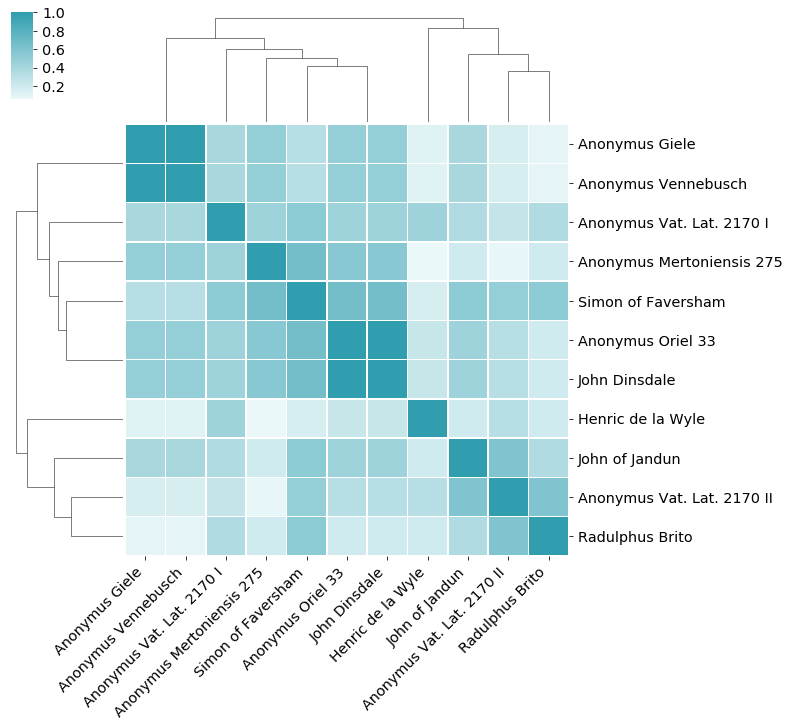

In [657]:
df = pd.DataFrame(d, index=author_names)

# Generate a custom diverging colormap
cmap = sns.light_palette((210, 90, 60), as_cmap=True, input="husl")

# Draw the heatmap with the mask and correct aspect ratio
plot = sns.clustermap(df, cmap=cmap, linewidths=.5, row_cluster=True)
for _, ax in enumerate(plot.fig.axes):
    ax.set_xticklabels(ax.get_xticklabels(), rotation = 45, horizontalalignment='right')


In [655]:
plot.savefig('../figures/science-determ-proportional-clustermap.pdf')
print_figure_inclusion(
    '../figures/science-determ-proportional-clustermap', plot,
    caption='Proportional clustermap of determination doctrines.',
    label='fig:sci:determ:prop-clustermap')

\begin{figure}
\centering
\includegraphics[width=\linewidth]{data/figures/science-determ-proportional-clustermap.pdf}
\caption{Proportional clustermap of determination doctrines.}
\label{fig:sci:determ:prop-clustermap}
\end{figure}


In [602]:
# Mean commonality values 
df.mean().sort_values(ascending=False).round(1)

Simon of Faversham            0.5
John Dinsdale                 0.5
Anonymus Oriel 33             0.5
Anonymus Vat. Lat. 2170 I     0.5
Anonymus Vennebusch           0.5
Anonymus Giele                0.5
John of Jandun                0.5
Anonymus Mertoniensis 275     0.4
Anonymus Vat. Lat. 2170 II    0.4
Radulphus Brito               0.4
Henric de la Wyle             0.3
dtype: float64

In [603]:
# Dinsdale example
dins = df['John Dinsdale'].round(decimals=2)
save_table('../tables/dinsdale-fingerprint.tex', dins.to_latex(), 
           caption='Example of proportional shared profile for determination doctrines of John Dinsdale.',
           label='tab:sci:determ:profile-dinsdale')
dins

Anonymus Giele                0.50
Anonymus Mertoniensis 275     0.56
Anonymus Oriel 33             1.00
Anonymus Vat. Lat. 2170 I     0.45
Anonymus Vat. Lat. 2170 II    0.33
Anonymus Vennebusch           0.50
Henric de la Wyle             0.25
John Dinsdale                 1.00
John of Jandun                0.45
Radulphus Brito               0.20
Simon of Faversham            0.67
Name: John Dinsdale, dtype: float64

# Create doctrinal matrix
Here we want to create a matrix table where it can be seen in more detail which doctrines each commentator uses. It is probably a good idea to distinguish between determination doctrines and rationes doctrines.

First we pull out a list of the names of the doctrines in determinations of each commentator.

In [632]:
def determination_doctrines_of(name):
    q = ("MATCH (a:Author)--(t:Text)--(q:Question)--(d:Doctrine)"
         "WHERE a.name = '{name}'"
         "AND NOT (d)-[:ATTACKS]->()"
         "RETURN d.name".format(name=name))
    return [t[0] for t in run_transaction(q).values()]

# Example test
determination_doctrines_of("Anonymus Giele")

['There can be a science of the soul', 'Substantial knowledge from accidents']

Then we create a full list of all the doctrines in determinations.

In [633]:
def all_determination_doctrines():
    q = ("MATCH (d:Doctrine) WHERE NOT (d)-[:ATTACKS]->()"
         "AND NOT d.name = 'There can be a science of the soul'"
         "RETURN d.name ORDER BY d.name asc")
    return [t[0] for t in run_transaction(q).values()]

all_docs = all_determination_doctrines()

# Test output
all_docs

['Intellect especially difficult to know',
 'No science of the separate soul',
 'Proper and improper science',
 'Science by answering (four) scientific questions',
 'Science of form and perfection',
 'Science through self-reflection',
 'Science through subject, properties, principles',
 'Substantial knowledge from accidents',
 'Three meanings of science']

Now for each author we register how many of the doctrines he ticks off and reads that into a matrix.

In [634]:
matrix = {}
for author in author_names:
    matrix[author] = []
    adocs = determination_doctrines_of(author)
    for doc in all_docs:
        if doc in adocs:
            matrix[author].append(1)
        else:
            matrix[author].append(0)


df = pd.DataFrame(matrix, index=all_docs)

Okay, I want to sort the matrix by how many doctrines the texts contain. This means that we sort the columns based on the sum of the values. Oddly enough I can't figure out how to do that within the `DataFrame`, so instead I create a dict, from that a list of the authors sorted by their sum doctrines. That list is used for keys in building a new matrix with the desired order. But then the rows and columns are switched, so I need to transmute those with the `zip` function. *This just doesn't feel right*.

In [635]:
def create_matrix(numeric=True):
    matrix = {}
    if numeric:
        true_val = 1
        false_val = 0
    else:
        true_val = 'x'
        false_val = ''
        
    for author in author_names:
        matrix[author] = []
        adocs = determination_doctrines_of(author)
        for doc in all_docs:
            if doc in adocs:
                matrix[author].append(true_val)
            else:
                matrix[author].append(false_val)
    sorted_names = sorted(matrix, key=matrix.get, reverse=True)
    m = [matrix[key] for key in sorted_names]
    m = [list(i) for i in zip(*m)]
    return pd.DataFrame(m, columns=sorted_names, index=all_docs)

create_matrix(numeric=False)

,Radulphus Brito,Simon of Faversham,John of Jandun,Anonymus Vat. Lat. 2170 II,Anonymus Mertoniensis 275,Anonymus Oriel 33,John Dinsdale,Henric de la Wyle,Anonymus Vat. Lat. 2170 I,Anonymus Giele,Anonymus Vennebusch
Intellect especially difficult to know,x,x,x,x,,,,,,,
No science of the separate soul,x,,,,,,,,,,
Proper and improper science,,x,,,x,x,x,,,,
Science by answering (four) scientific questions,,,x,,,,,,,,
Science of form and perfection,,,,,,,,x,,,
Science through self-reflection,x,x,,,x,,,,x,,
"Science through subject, properties, principles",x,x,x,x,,x,x,x,x,,
Substantial knowledge from accidents,,x,x,,x,x,x,,x,x,x
Three meanings of science,,,,,,,,x,x,,


I can sort the sum of the DataFrame like this, but I can't figure out how to sort the columns by that.

In [636]:

df = create_matrix(numeric=True)
sums = df.sum().sort_values(ascending=False)
sums

Simon of Faversham            5
Anonymus Vat. Lat. 2170 I     4
John of Jandun                4
Radulphus Brito               4
Henric de la Wyle             3
John Dinsdale                 3
Anonymus Oriel 33             3
Anonymus Mertoniensis 275     3
Anonymus Vat. Lat. 2170 II    2
Anonymus Vennebusch           1
Anonymus Giele                1
dtype: int64

In [637]:
#print(sums.to_latex())

What is the mean amount of doctrines?

In [638]:
df.sum().mean()

3.0

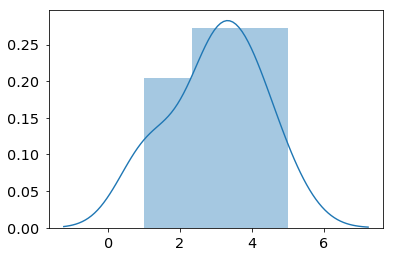

In [639]:
sns.distplot(df.sum())

### Popularity of arguments

In [640]:
df.sum(axis=1).sort_values(ascending=False)

Substantial knowledge from accidents                8
Science through subject, properties, principles     8
Science through self-reflection                     4
Proper and improper science                         4
Intellect especially difficult to know              4
Three meanings of science                           2
Science of form and perfection                      1
Science by answering (four) scientific questions    1
No science of the separate soul                     1
dtype: int64

# Binary matrix cluster analysis
So what if we take the binary matrix representing the presence or absence of a doctrine and use that for clustering?
I have used this as an inspiration: https://stats.stackexchange.com/questions/222492/any-distance-measures-that-are-more-useful-for-binary-data-clustering.
As suggested in the post we use the Hamming metric for distance measuring, as that just counts the number of coordinates that differ. AS it is also mentioned in the scipy documentation it can therefore be used for boolean matrices (https://docs.scipy.org/doc/scipy/reference/generated/scipy.spatial.distance.pdist.html).

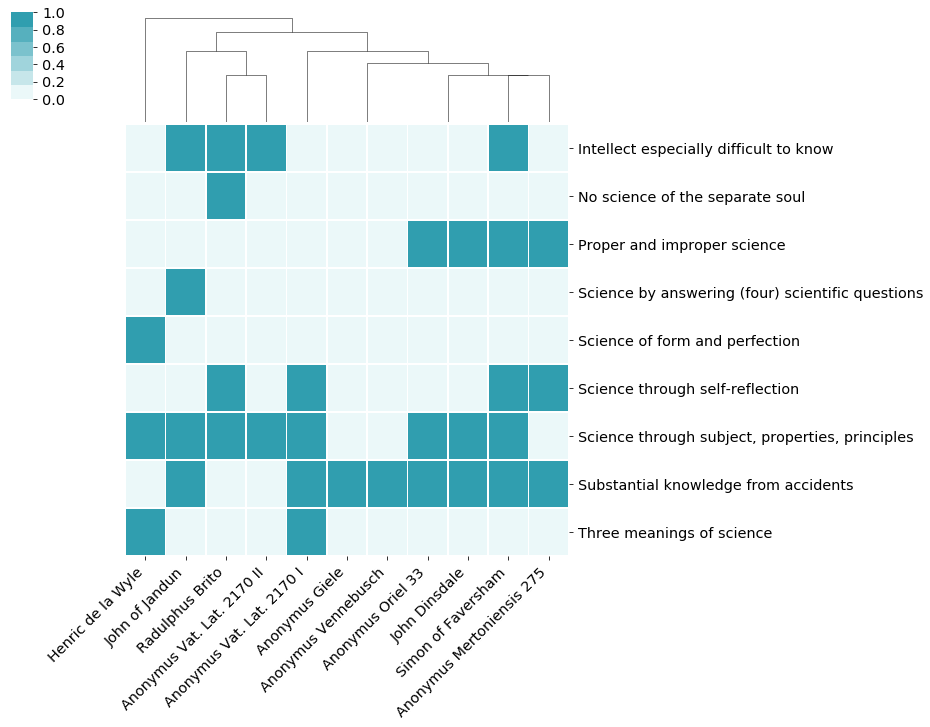

In [650]:
df = create_matrix(numeric=True)

# Generate a custom diverging colormap
cmap = sns.light_palette((210, 90, 60), input="husl")

# Draw the heatmap with the mask and correct aspect ratio
plot = sns.clustermap(df, cmap=cmap, linewidths=.5, row_cluster=False, metric='hamming')

for _, ax in enumerate(plot.fig.axes):
    ax.set_xticklabels(ax.get_xticklabels(), rotation = 45, horizontalalignment='right')

In [651]:
plot.savefig('../figures/science-determinations-binary-clustermap.pdf')
print_figure_inclusion(
    'science-determinations-binary-clustermap', plot,
    caption='Binary clustermap of determination doctrines.',
    label='fig:sci:determ:binary-clustermap')

\begin{figure}
\centering
\includegraphics[width=\linewidth]{data/figures/science-determinations-binary-clustermap.pdf}
\caption{Binary clustermap of determination doctrines.}
\label{fig:sci:determ:binary-clustermap}
\end{figure}


# Doctrines in rationes
How about if we only focus on rationes?

## Proportional representation

First, let's get some simple quantitative data on the amount of doctrines each author has in each category.

In [615]:
def number_unique_rationes_doctrines(name):
    with driver.session() as session:
        with session.begin_transaction() as tx:
            res = tx.run("MATCH (a:Author)--(:Text)--(q:Question)--(d:Doctrine)"
                         "WHERE (d)-[:ATTACKS]->() AND a.name = {name}"
                         "AND NOT (:Question)--(d)--(q:Question)"
                         "RETURN count(distinct d)", name=name)
            return res.single()['count(distinct d)']
            
number_unique_rationes_doctrines('John of Jandun')

5

In [616]:
def number_shared_rationes_doctrines(name):
    with driver.session() as session:
        with session.begin_transaction() as tx:
            res = tx.run("MATCH (a:Author)--(:Text)--(q:Question)--(d:Doctrine)"
                         "WHERE (d)-[:ATTACKS]->() AND a.name = {name}"
                         "MATCH (q1:Question)--(d)--(q:Question)"
                         "WHERE (q1) <> (q)"
                         "RETURN count(distinct d)", name=name)
            return res.single()['count(distinct d)']

number_shared_rationes_doctrines('John of Jandun')

7

Proportion unique of all doctrines

In [617]:
number_unique_rationes_doctrines('John of Jandun') / sum([number_unique_rationes_doctrines('John of Jandun'), 
                                                          number_shared_rationes_doctrines('John of Jandun')])

0.4166666666666667

Now let's get the values of these for all the commentators and put them into a matrix.

In [618]:
def unique_shared_proportions_all():
    d = {}
    for a in author_names:
        unique = number_unique_rationes_doctrines(a)
        shared = number_shared_rationes_doctrines(a)
        if unique is not 0:
            prop = number_unique_rationes_doctrines(a) / sum([number_unique_rationes_doctrines('John of Jandun'), 
                                                              number_shared_rationes_doctrines('John of Jandun')])
        else:
            prop = 0

        d[a] = [unique, shared, unique + shared, round(prop, 2)]

    return d
m = unique_shared_proportions_all()


Put this in a DataFrame and sort according to most unique.

In [619]:
df = pd.DataFrame(m, index=['Unique', 'Shared', 'Sum', 'Proportion'])
df = df.T.sort_values(by='Sum', ascending=False)
df[['Unique', 'Shared', 'Sum']] = df[['Unique', 'Shared', 'Sum']].apply(np.int64)
df

,Unique,Shared,Sum,Proportion
John of Jandun,5,7,12,0.42
Anonymus Mertoniensis 275,4,7,11,0.33
Henric de la Wyle,4,7,11,0.33
Anonymus Oriel 33,0,9,9,0.00
John Dinsdale,0,9,9,0.00
Simon of Faversham,2,5,7,0.17
Anonymus Vat. Lat. 2170 I,2,4,6,0.17
Radulphus Brito,2,4,6,0.17
Anonymus Giele,0,5,5,0.00
Anonymus Vat. Lat. 2170 II,0,3,3,0.00


In [620]:
# Some saving could be set up here...
save_table('../tables/sci-rationes-quantities.tex', df.to_latex(), 
           caption='Unique, shared, total, and proportion of unique to shared doctrines in rationes.',
           label='tab:sci:rationes:quantities')

In [621]:
# The sums?
df[['Unique', 'Shared', 'Sum']].sum()

Unique    19
Shared    60
Sum       79
dtype: int64

In [622]:
# Number of distinct rationes
rationes_count = run_transaction('MATCH (d:Doctrine)'
                                 'WHERE (d)-[:ATTACKS]->()'
                                 'RETURN count(DISTINCT d)').single()[0]
rationes_count

36

In [623]:
# Proportion of unique
df['Unique'].sum() / rationes_count

0.5277777777777778

In [624]:
# Proportion of unique instances
df['Unique'].sum() / df['Sum'].sum()

0.24050632911392406

In [625]:
# Average use number of non-uniques
round(df['Sum'].sum() / (rationes_count - df['Unique'].sum()), 1)

4.6

But the relative proportions in relation to all the others is more interesting...

In [626]:
def proportion_shared_rationes_doctrines(name):
    with driver.session() as session:
        with session.begin_transaction() as tx:
            res = tx.run("MATCH (a:Author)--(:Text)--(q1:Question)--(d:Doctrine)"
                         "MATCH (:Doctrine {name:'There can be a science of the soul'})<-[:ATTACKS *1..5]-(d)"
                         "WHERE a.name = {name}"
                         "MATCH (d)--(q2:Question)--(:Text)--(a2:Author)"
                         "MATCH (:Doctrine {name:'There can be a science of the soul'})<-[:ATTACKS *1..5]-(d1:Doctrine)--(q1)"
                         "MATCH (:Doctrine {name:'There can be a science of the soul'})<-[:ATTACKS *1..5]-(d2:Doctrine)--(q2)"
                         "RETURN a2.name, (toFloat(count(distinct d)) / count(distinct d1)) * (toFloat(count(distinct d)) / count(distinct d2))", name=name)
            return {r[0]: r[1] for r in res}

proportion_shared_rationes_doctrines('John of Jandun')

{'Anonymus Giele': 0.15,
 'Anonymus Mertoniensis 275': 0.007575757575757576,
 'Anonymus Oriel 33': 0.08333333333333333,
 'Anonymus Vat. Lat. 2170 I': 0.125,
 'Anonymus Vat. Lat. 2170 II': 0.027777777777777776,
 'Henric de la Wyle': 0.06818181818181818,
 'John Dinsdale': 0.08333333333333333,
 'John of Jandun': 1.0,
 'Radulphus Brito': 0.05555555555555555,
 'Simon of Faversham': 0.10714285714285714}

In [627]:
d = build_matrix(author_names, docfunc=proportion_shared_rationes_doctrines)

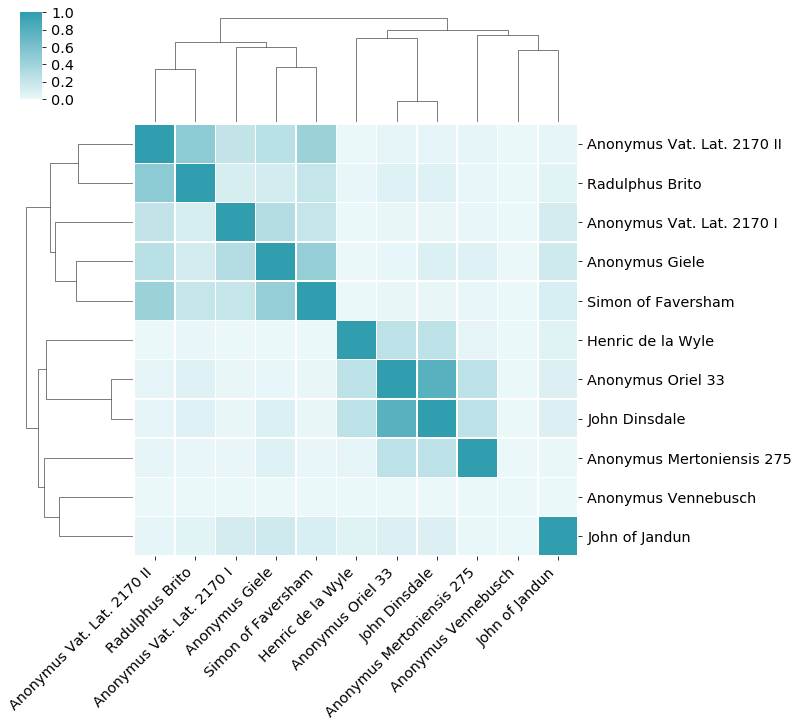

In [628]:
df = pd.DataFrame(d, index=author_names)

# Generate a custom diverging colormap
cmap = sns.light_palette((210, 90, 60), as_cmap=True, input="husl")

# Draw the heatmap with the mask and correct aspect ratio
plot = sns.clustermap(df, cmap=cmap, linewidths=.5, row_cluster=True)
for _, ax in enumerate(plot.fig.axes):
    ax.set_xticklabels(ax.get_xticklabels(), rotation = 45, horizontalalignment='right')

In [629]:
plot.savefig('../figures/science-rationes-proportional-clustermap.pdf')
print_figure_inclusion(
    '../figures/science-rationes-proportional-clustermap', plot,
    caption='Proportional clustermap of rationes doctrines.',
    label='fig:sci:rationes:prop-clustermap')

\begin{figure}
\centering
\includegraphics[width=\linewidth]{data/figures/science-rationes-proportional-clustermap.pdf}
\caption{Proportional clustermap of rationes doctrines.}
\label{fig:sci:rationes:prop-clustermap}
\end{figure}


## Binary doctrines

In [630]:
# All doctrines except the base statement of the science
def all_rationes_doctrines():
    q = ("MATCH (:Doctrine {name:'There can be a science of the soul'})<-[:ATTACKS]-(d)"
         "RETURN distinct(d.name) ORDER BY d.name asc")
    return [t[0] for t in run_transaction(q).values()]

all_docs = all_rationes_doctrines()

# Test output
len(all_docs)

18

In [631]:
def all_rationes_doctrines_of(name):
    q = ("MATCH (r:Doctrine) WHERE r.name='There can be a science of the soul'"
         "MATCH (r)<-[:ATTACKS]-(d:Doctrine)"
         "MATCH (a:Author)--(t:Text)--(q:Question)--(d)"
         "WHERE a.name = '{name}'"
         "RETURN distinct(d.name)".format(name=name))
    return [t[0] for t in run_transaction(q).values()]

# Example test
all_rationes_doctrines_of("John of Jandun")

['No science about corruptible things, so no science about the soul',
 'Intellect denudated of object before knowledge, so no science of the soul',
 'No identity of mover and moved, so no science of the soul',
 'No sense perception of the soul, so there cannot be a science about it',
 'Soul not intelligible to us',
 'No science about the non-existent, so no science about the soul',
 'Identity between science and thing known, so now science about the soul',
 'Soul is a particular, so there can be no science about it']

In [568]:
def create_matrix(numeric=True):
    matrix = {}
    if numeric:
        true_val = 1
        false_val = 0
    else:
        true_val = 'x'
        false_val = ''
        
    for author in author_names:
        matrix[author] = []
        adocs = all_rationes_doctrines_of(author)
        for doc in all_docs:
            if doc in adocs:
                matrix[author].append(true_val)
            else:
                matrix[author].append(false_val)
    sorted_names = sorted(matrix, key=matrix.get, reverse=True)
    m = [matrix[key] for key in sorted_names]
    m = [list(i) for i in zip(*m)]
    return pd.DataFrame(m, columns=sorted_names, index=all_docs)

create_matrix(numeric=False)

,Radulphus Brito,Anonymus Vat. Lat. 2170 I,John of Jandun,Henric de la Wyle,Anonymus Oriel 33,John Dinsdale,Anonymus Mertoniensis 275,Simon of Faversham,Anonymus Vat. Lat. 2170 II,Anonymus Giele,Anonymus Vennebusch
"Act and potency problem, so no science of the soul",x,,,,,,,,,,
"Difference between knower and known, so no science of the soul",,x,,,,,,,,,
"Identity between science and thing known, so now science about the soul",,,x,,,,,,,,
"Intellect denudated of object before knowledge, so no science of the soul",,,x,,,,,,,,
"Knowledge is continuous and temporal, so no science of the soul",,,,x,x,x,x,,,,
"No identity of mover and moved, so no science of the soul",,,x,x,x,x,,,,,
"No intellectual self-knowledge, so no science of the soul",,,,,,,x,,,,
"No phantasm from the soul, so no science about it",,,,x,,,x,,,,
"No science about corruptible things, so no science about the soul",,x,x,,,,,,,,
"No science about the non-existent, so no science about the soul",,,x,,,,,,,,


And now a bit of quantitative info.

In [569]:
df = create_matrix(numeric=True)
sums = df.sum().sort_values(ascending=False)
sums
#print(sums.to_latex())

John of Jandun                8
Anonymus Mertoniensis 275     6
John Dinsdale                 5
Anonymus Oriel 33             5
Henric de la Wyle             5
Simon of Faversham            4
Radulphus Brito               4
Anonymus Vat. Lat. 2170 I     3
Anonymus Giele                2
Anonymus Vat. Lat. 2170 II    2
Anonymus Vennebusch           0
dtype: int64

In [570]:
df.sum().mean()

4.0

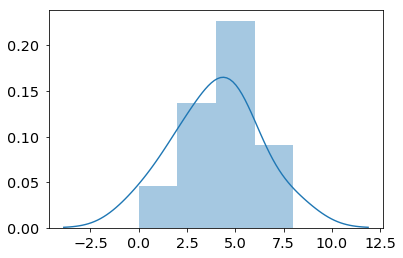

In [571]:
sns.distplot(df.sum())

In [572]:
df.sum(axis=1).sort_values(ascending=False)

No sense perception of the soul, so there cannot be a science about it           9
Soul not intelligible to us                                                      5
Knowledge is continuous and temporal, so no science of the soul                  4
No identity of mover and moved, so no science of the soul                        4
Things most manifest in nature are opaque, so no science of the soul             3
Soul is a particular, so there can be no science about it                        3
Science about subject with parts and properties, so no science about the soul    3
No phantasm from the soul, so no science about it                                2
No science about corruptible things, so no science about the soul                2
No science about the non-existent, so no science about the soul                  1
Science about universals abstracted from perception                              1
No intellectual self-knowledge, so no science of the soul                        1
Scie

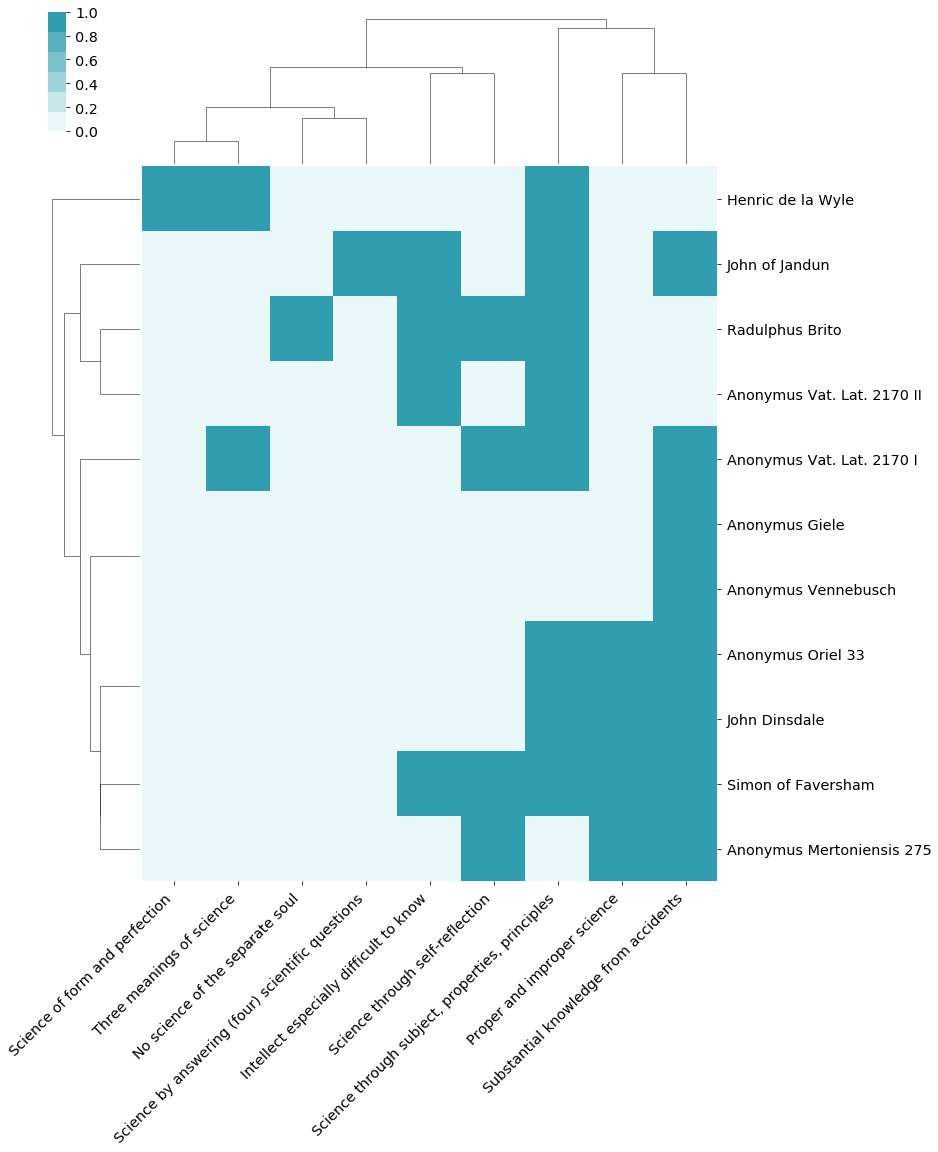

In [662]:
df = create_matrix(numeric=True).T

# Generate a custom diverging colormap
cmap = sns.light_palette((210, 90, 60), input="husl")

# Draw the heatmap with the mask and correct aspect ratio
plot = sns.clustermap(df, cmap=cmap, linewidths=.5, metric='hamming', 
                      row_cluster=True, figsize=(12,16))

for _, ax in enumerate(plot.fig.axes):
    ax.set_xticklabels(ax.get_xticklabels(), rotation = 45, horizontalalignment='right')
    
plot.savefig('../figures/science-determinations-binary-cluster.png')

In [661]:
plot.savefig('../figures/science-rationes-binary-clustermap.pdf')
print_figure_inclusion(
    '../figures/science-rationes-binary-clustermap', plot,
    caption='Binary clustermap of rationes doctrines.',
    label='fig:sci:rationes:binary-clustermap')

\begin{figure}
\centering
\includegraphics[width=\linewidth]{data/figures/science-rationes-binary-clustermap.pdf}
\caption{Binary clustermap of rationes doctrines.}
\label{fig:sci:rationes:binary-clustermap}
\end{figure}
